# Introduction to signals

* [1. Classification of Signals](#1)
	* [1.1 Continuous-time and discrete-time signals](#1.1)
    * [1.2 Analog and digital signals](#1.2)
    * [1.3 Periodic and aperiodic signals](#1.3)
    * [1.4 Energy and power signals](#1.4)
    * [1.5 Deterministic and probabilistic signals](#1.5)
    * [1.6 Causal and noncausal](#1.6)
    * [1.7 Even and odd signals](#1.7)
* [2. Some Useful Signal Models](#2)
    * [2.1 Unit Step Function](#2.1)
    * [2.2 The Unit Impulse Function](#2.2)
    * [2.3 The Exponential Function](#2.2)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# library signal from scipy contains most of the functions we will work with in this course:
from scipy import signal


## Classifications of Signals
<a class="anchor" id="1"></a>

### Continuous-time and discrete-time signals
<a class="anchor" id="1.1"></a>

#### Continuous-time signals

- A signal that is specified for a continuum of values of time $t$ is a $\textbf{continuous-time signal}$.

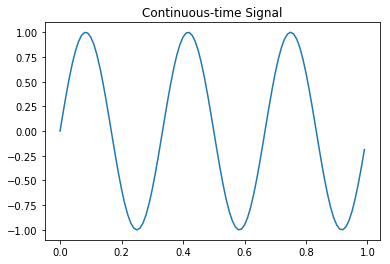

In [2]:
t = np.arange(0,1,0.01)
x = np.sin(2*np.pi*3*t)
plt.plot(t,x)
plt.title('Continuous-time Signal')
plt.show()

Discrete-time signals


- A signal that is specified only at discrete values of $t$ is a $\textbf{discrete-time signal}$.

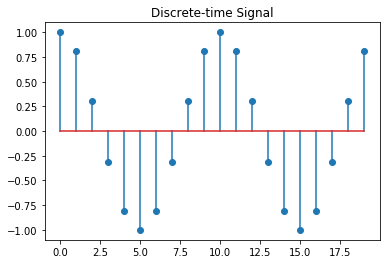

In [3]:
n = np.arange(0,20)
x = np.cos(0.2*np.pi*n)
plt.stem(n,x)
plt.title('Discrete-time Signal')
plt.show()

### Analog and digital signals
<a class="anchor" id="1.2"></a>

- A signal whose amplitude can take on $\textbf{any value in a continuous range}$ is an analog signal (analog signal amplitude can take on an infinite number of values).
- A digital signal is one whose amplitude can take on only a $\textbf{finite number of values}$. Digital computer signals are digital (they represent information using zeros and ones).
- Analog is not necessarily continuous-time and digital need not be discrete-time.

#### Analog and digital signals examples:

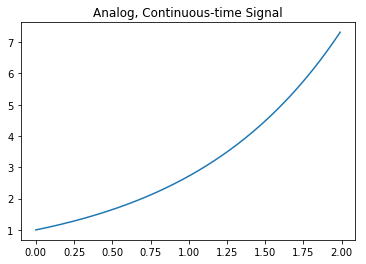

In [4]:
t = np.arange(0,2,0.01)
x = np.exp(t)
plt.plot(t,x)
plt.title('Analog, Continuous-time Signal')
plt.show()

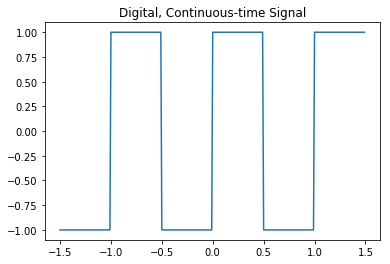

In [5]:
t = np.arange(-1.5,1.5,0.01)
x = -1*(t>=-1.5)+2*(t>=-1)-2*(t>=-0.5)+2*(t>=0)-2*(t>=0.5)+2*(t>=1)  # (t>=-1.5) is boolean, but python converts it to 1 or 0
plt.plot(t,x)
plt.title('Digital, Continuous-time Signal')
plt.show()

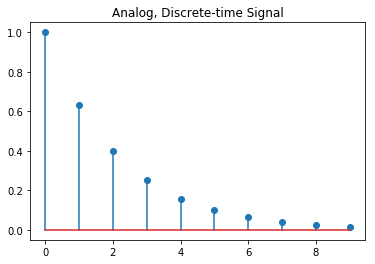

In [6]:
n = np.arange(0,10)
x = (0.1)**(0.2*n)
plt.stem(n,x)
plt.title('Analog, Discrete-time Signal')
plt.show()

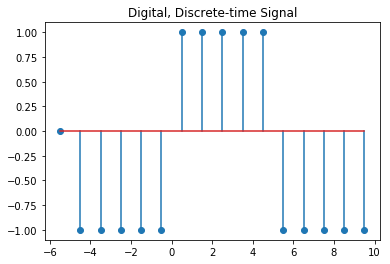

In [7]:
n = np.arange(-5.5,10.5)
x = -1*(n>=-5)+2*(n>=0)-2*(n>=5)+2*(n>=10)
plt.stem(n,x)
plt.title('Digital, Discrete-time Signal')
plt.show()

### Periodic and aperiodic signals
<a class="anchor" id="1.3"></a>

- A signal x(t) is said to be periodic if for some positive constant T.

    $x(t+T)=x(t) \ \ for \ \ all \ t
    \\
    x[n+N]=x[n] \ \ for \ \  all \ n$

- The smallest value of $T(N)$ that satisfies the above condition is the period of $x(t)$ denoted by $T{_{0}}$  ($N{_{0}}$).

- A periodic signal, by definition, must start at minus infinity and continue forever.
- $x(t)$ can be generated by periodic extension of any segment of $x(t)$ of duration of the period.

- The area under any interval of duration of the period is the same.

    $\int_{a}^{a+T{_{0}}}x(t)dt=\int_{b}^{b+T{_{0}}}x(t)dt$

#### Periodic signal

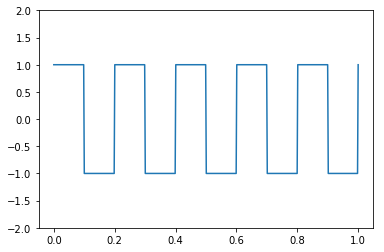

In [8]:
# A 5 Hz waveform sampled at 500 Hz for 1 second

t = np.linspace(0, 1, 500)
plt.plot(t, signal.square(2 * np.pi * 5 * t))  # here we use signal.square() function
plt.ylim(-2, 2)
plt.show()

#### Aperiodic Signal

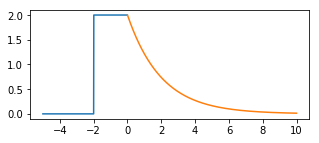

In [9]:
plt.figure(figsize=(5,2))
t1 = np.arange(-5, 0, 0.01)
t2 = np.arange(0, 10, 0.01)

def u1(t): 
    return 2*(t>-2)

def u2(t):
    return 2*np.exp(-t/2)

plt.plot(t1,u1(t1),t2,u2(t2))
plt.show()

### Energy and power signals
<a class="anchor" id="1.4"></a>

- Two possible measures of the size of a signal:

    - Signal energy - A signal with finite energy is an energy signal
    - Signal Power - A signal with finite and nonzero power is a power signal

- Periodic and random signals are power signals.

#### Energy Signal

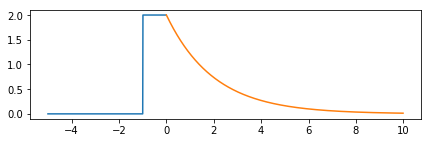

In [10]:
plt.figure(figsize=(7,2))
t1 = np.arange(-5, 0, 0.01)
t2 = np.arange(0, 10, 0.01)

def u1(t): 
    return 2*(t>-1)

def u2(t):
    return 2*np.exp(-t/2)

plt.plot(t1,u1(t1),t2,u2(t2))
plt.show()

#### Power Signal

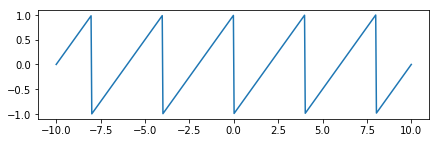

In [11]:
plt.figure(figsize=(7,2))
t = np.linspace(-10, 10, 500)
plt.plot(t, signal.sawtooth(np.pi*0.5*t))
plt.show()

### Deterministic and probabilistic signals
<a class="anchor" id="1.5"></a>

- A signal whose physical description is known completely, either in a mathematical form or a graphical form, is a deterministic signal. Deterministic signal can be given as a mathematical function, uniquely defined for each t.

- A signal whose values cannot be predicted precisely but are known only in terms of probabilistic description (noise).

#### Probabilistic signal

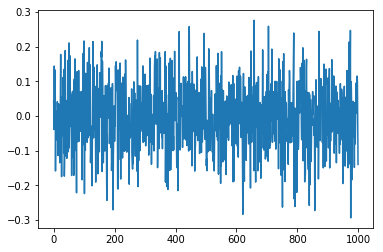

In [12]:
mu, sigma = 0, 0.1 # mean and standard deviation
noise = np.random.normal(mu, sigma, 1000)
plt.plot(noise)
plt.show()

### Causal and noncausal
<a class="anchor" id="1.6"></a>

- $x(t)$ is a causal signal if $x(t) = 0 \ \ for \ \ t <0$.
- A signal that starts before $t=0$  is noncausal.

#### Causal signal

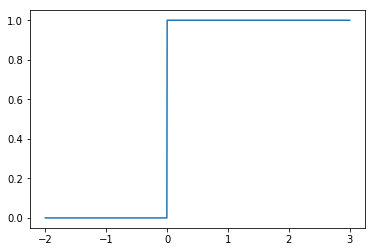

In [13]:
t = np.linspace(-2,3,1000)
u = 1*(t>0)
plt.plot(t,u)
plt.show()

#### Noncausal signal

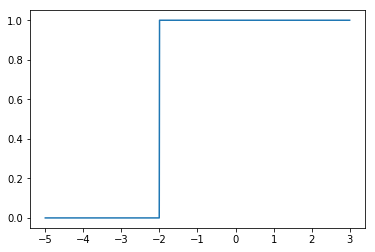

In [14]:
t = np.linspace(-5,3,1000)
u = 1*(t>-2)
plt.plot(t,u)
plt.show()

### Even and Odd Signals
<a class="anchor" id="1.7"></a>

- A real function $x(t)$ is said to be an $\textbf{even function}$ of t if $x(t)=x(−t)$ 
- A real function $x(t)$ is said to be an $\textbf{odd function}$ of t if $x(t)=−x(−t)$

#### Even Function

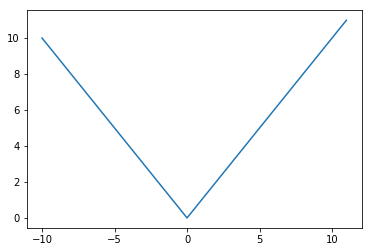

In [15]:
t = np.arange(-10,11,0.01)
x = np.abs(t)
plt.plot(t,x)
plt.show()

#### Odd Function

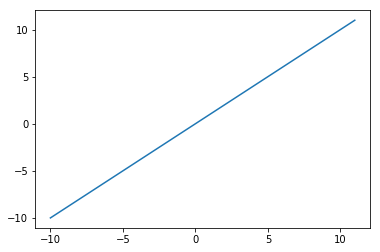

In [16]:
t = np.arange(-10,11,0.01)
x = t
plt.plot(t,x)
plt.show()

## Some Useful Signal Models
<a class="anchor" id="2"></a>

- Unit Step Function
- The Unit Impulse Function
- The Exponential Function

- These three functions play essential role in the area of signals and systems.

### Unit step function
<a class="anchor" id="2.1"></a>

- Causal functions can be conveniently described in terms of unit step (Heaviside) function:

$u(t) =\begin{cases}
1, & \text{if }t\geq 0 \\
0, & \text{if }t<0
\end{cases}$

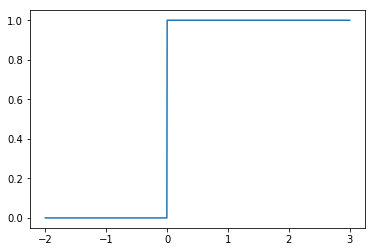

In [17]:
t = np.linspace(-2,3,1000)
def step(t):
    x = np.zeros(len(t))
    for k,tt in enumerate(t):
        if tt >= 0: # the jump occurs at t = 0
            x[k] = 1.0
    return x
plt.plot(t,step(t))
plt.show()

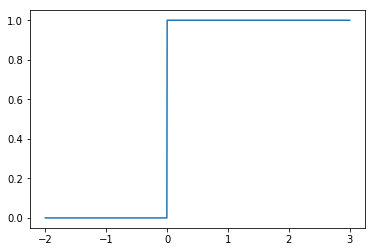

In [18]:
# we can generate step signal in one line:
t = np.linspace(-2,3,1000)
u = 1*(t>0)
plt.plot(t,u)
plt.show()

### The Unit Impulse Function
<a class="anchor" id="2.2"></a>

- This function was first defined by Paul Dirac:

$\delta(t) = 0 \ \ if \ \ t\neq 0
\\
\int_{+ \infty}^{-\infty}\delta(t)dt=1$

It is an abstract (mathematical) signal, we cannot generate it using digital computer.

In discrete time it is called Kronecker delta funtion:

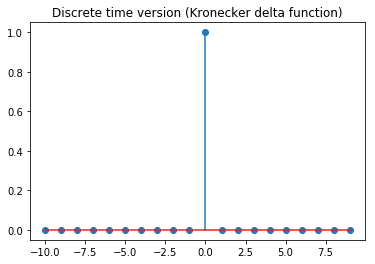

In [19]:
t = np.arange(-10,10,1)
x = np.zeros(20)
x[10] = 1
plt.stem(t,x)
plt.title('Discrete time version (Kronecker delta function)')
plt.show()

### Exponential Function
<a class="anchor" id="2.3"></a>

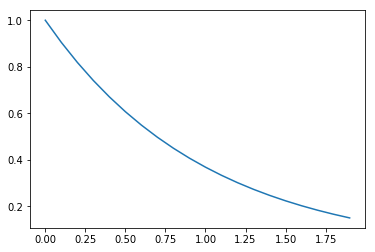

In [20]:
t = np.arange(0,2,0.1)
a=-1
x = np.exp(a*t)
plt.plot(t,x)
plt.show()

#### Exponentially damped sinusoid

$f(t) = e^{-t}cos(2 \pi\ t)$

- Plotting $f(t)$ over the intervall $(-2\leq t\leq 2)$, $f(t)$ oscillate four times with decaying evelope. 

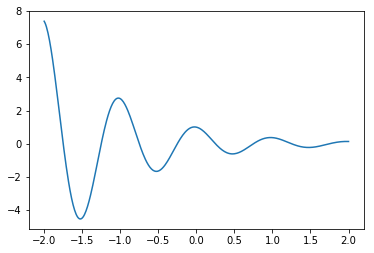

In [21]:
start = -2
stop = 2
step = 0.01
t = np.arange(start, stop+step, step)
f = np.exp(-t)*np.cos(2*np.pi*t)
plt.plot(t,f)
plt.show()

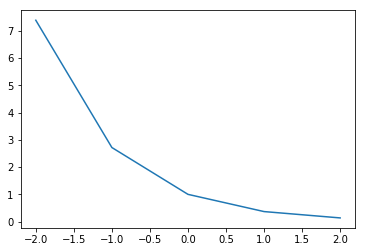

In [22]:
# if the step is not small enough, we can get very different signal
t = np.arange(-2,3)
f= np.exp(-t)*np.cos(2*np.pi*t)
plt.plot(t,f)
plt.show()

#### Exercise 1:  Plot (using stem()) the discrete-time damped sinusoid: $x[n]= (0.75)^n \sin(0.2\pi n)$. Observe what happens when changing parameters (0.75 and 0.2).

#### Exercise 2:  Plot the continuous-time signal $x(t)={\rm sinc}(at)=\frac{\sin(at)}{at}$ for $a=1,\pi, \pi/2, 2\pi...$